# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [10]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [12]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [15]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [16]:
# Extract all rows of data
table_rows = soup.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [20]:
# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    # Extract the text from each row and store it in a list
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    
    # Append the list of row data to the data_rows list
    data_rows.append(row_data)

In [22]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Define the column names based on the header row
header_row = table_rows[0]
column_names = [cell.text.strip() for cell in header_row.find_all('th')]

# Create a Pandas DataFrame
df = pd.DataFrame(data_rows, columns=column_names)


In [23]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [24]:
# Examine data type of each column
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [26]:
# Change data types for data analysis
# Convert 'terrestrial_date' column to datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert numeric columns to appropriate data types
numeric_columns = ['sol', 'ls', 'month', 'min_temp', 'pressure']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [27]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [29]:
# 1. How many months are there on Mars?
# Count the occurrences of each month on Mars
month_counts = df['month'].value_counts().sort_index()

# Print the result
print(month_counts)

month
1.0     174
2.0     178
3.0     192
4.0     194
5.0     149
6.0     147
7.0     142
8.0     141
9.0     134
10.0    112
11.0    138
12.0    166
Name: count, dtype: int64


In [31]:
# 2. How many Martian days' worth of data are there?
# Count the number of unique Martian days (sols)
num_sols = df['sol'].nunique()

# Print the result
print("Number of Martian days:", num_sols)

Number of Martian days: 1867


In [33]:
# 3. What is the average low temperature by month?
# Calculate the average low temperature by month
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print(average_low_temp_by_month)


month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64


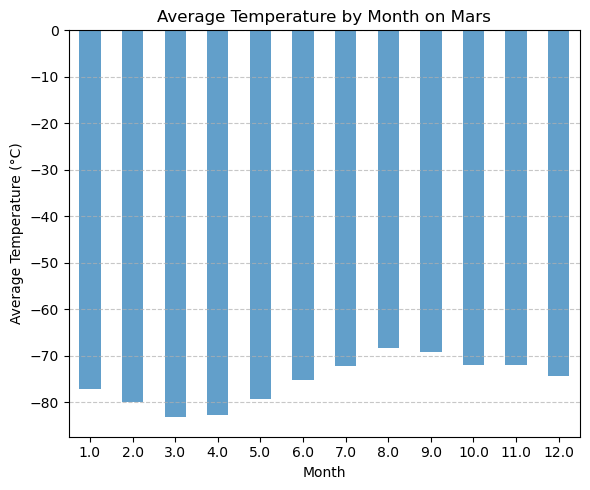

In [45]:
# Plot the average temperature by month
plt.figure(figsize=(6, 5))
average_temp_by_month.plot(kind='bar', color='#1f77b4', alpha=0.7)
plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

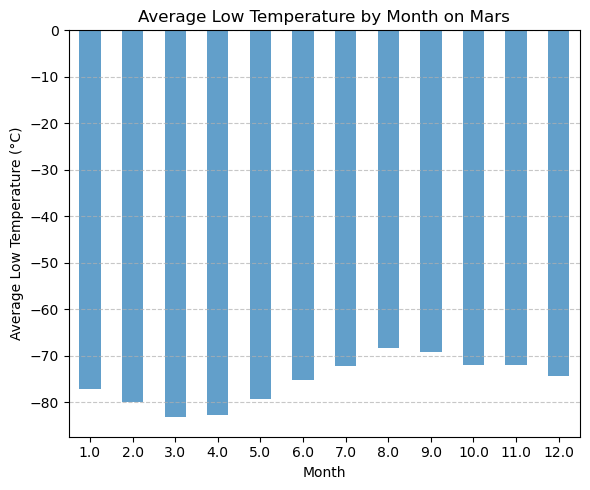

In [67]:
# Plot the average temperature by month as a bar chart
plt.figure(figsize=(6,5))
average_low_temp_by_month.plot(kind='bar', color='#1f77b4', alpha=0.7)
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


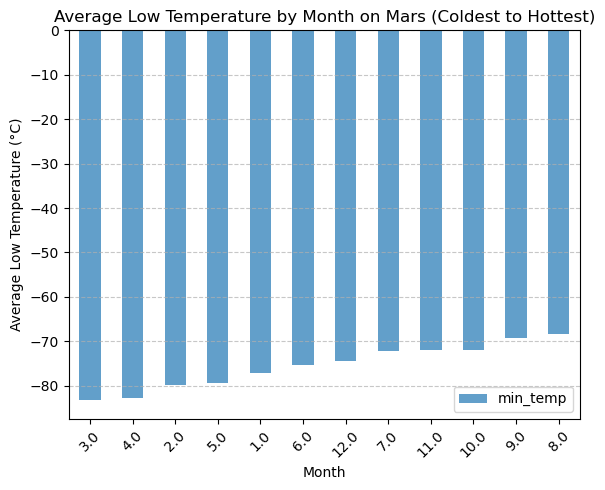

In [68]:
# Identify the coldest and hottest months in Curiosity's location
# Reorder the average_low_temp_by_month series from coldest to hottest months
ordered_low_temp_by_month = average_low_temp_by_month.sort_values()

# Plot the reordered average temperature by month as a bar chart
plt.figure(figsize=(6,5))
ordered_low_temp_by_month.plot(kind='bar', color='#1f77b4', alpha=0.7)
plt.title('Average Low Temperature by Month on Mars (Coldest to Hottest)')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend()
plt.tight_layout()
plt.show()


In [60]:
# 4. Average pressure by Martian month
# Convert pressure data to numerical format if needed
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Calculate the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure_by_month)


month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


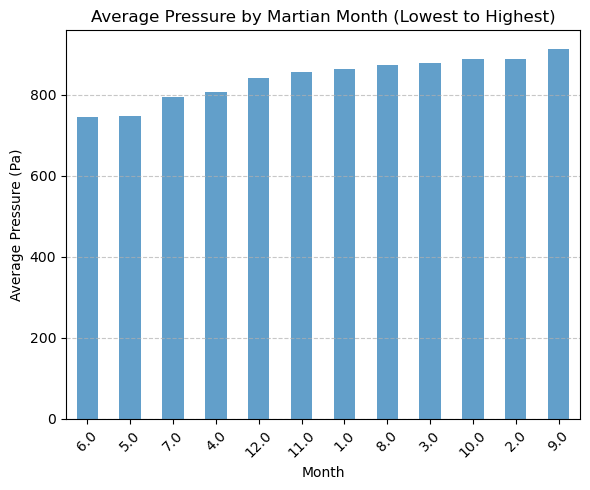

In [69]:
# Plot the average pressure by month
# Reorder the average_pressure_by_month series from lowest to highest
ordered_pressure_by_month = average_pressure_by_month.sort_values()

# Plot the reordered average pressure by month as a bar chart
plt.figure(figsize=(6,5))
ordered_pressure_by_month.plot(kind='bar', color='#1f77b4', alpha=0.7)
plt.title('Average Pressure by Martian Month (Lowest to Highest)')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

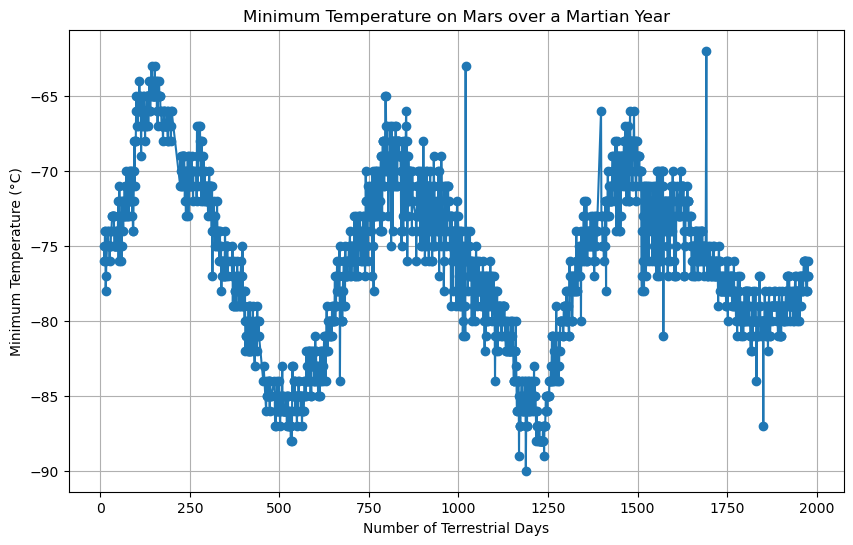

In [90]:
# Importing matplotlib library for plotting
import matplotlib.pyplot as plt

# Number of terrestrial (earth) days in a Martian year
earth_days_in_martian_year = 687

# Plotting the minimum temperature against the number of terrestrial days
plt.figure(figsize=(10, 6))
plt.plot(df['sol'], df['min_temp'], marker='o', linestyle='-')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature on Mars over a Martian Year')
plt.grid(True)
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [91]:
# Write the data to a CSV
# Define the filename for the CSV file
csv_filename = "mars_temperature_data.csv"

# Write the DataFrame to a CSV file
df.to_csv(csv_filename, index=False)

print("Data has been successfully written to", csv_filename)


Data has been successfully written to mars_temperature_data.csv


In [92]:
browser.quit()